# Compute Optic Flow
## Optic flow as 3d vector

$$
    p = \frac{v - (v . u) u}{D}
$$

## Optic flow as 2d vector on image plane

$$
of = \begin{bmatrix}
        p . a \\
        p . b
    \end{bmatrix}
$$

In [1]:
# Load modules and parameters
import numpy as np
import pickle
import matplotlib.pylab as plt 
%matplotlib inline

with open('obsRotated.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    obstacle, v = pickle.load(f)
with open('OFobjs.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    unit,a,b = pickle.load(f)
with open('distance.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    D_vec = pickle.load(f)
with open('layout.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    layout = pickle.load(f)

In [2]:
mat = np.column_stack([unit, D_vec])


In [3]:
D_vec = np.array(D_vec)

In [4]:
def display_vectors(X, V):
    fig, axarr = plt.subplots(nrows=1, 
                              ncols=2, 
                              figsize=[10,5])
    # Top view
    for [ax, title, xlabel, ylabel, xx, yy, uu, vv] in zip(axarr, 
                                                   ['Top view', 'Side view'],
                                                   ['X', 'X'],
                                                   ['Y', 'Z'],
                                                   [X[0], X[0]],
                                                   [X[1], X[2]],
                                                   [V[0], V[0]],
                                                   [V[1], V[2]]):
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.quiver(xx, yy, uu, vv)

    fig.tight_layout()
    

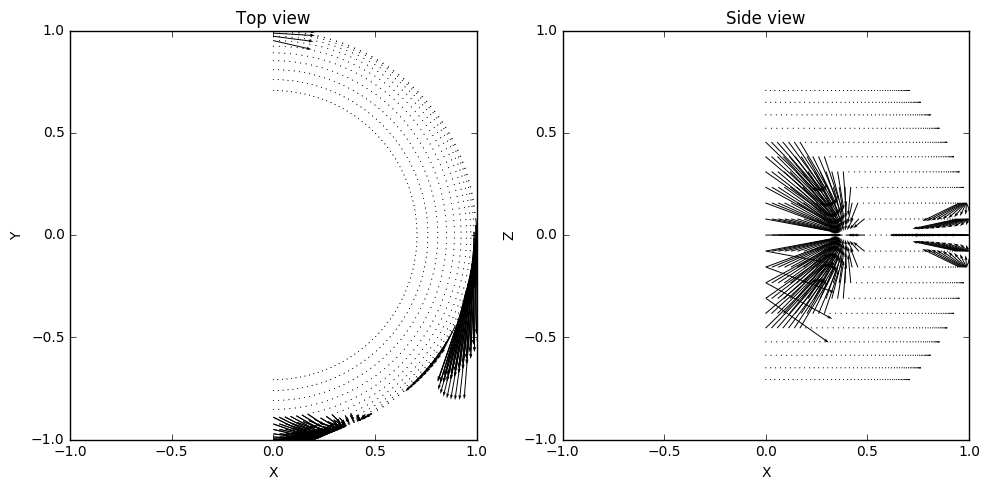

In [5]:
p = []
for i in mat:
    if i[3]!= 0:       
        p.append( - (v - np.dot(i[0:3], v[np.newaxis,:].T) * i[0:3]) / (i[3])) 
        #print(p)
    if i[3]== 0:
        p.append([0,0,0])
p = np.array(p)

#print(p)
# Display
display_vectors(unit.T, p.T)


In [6]:
layout = np.array(layout)
d,r,c = layout.shape
layout = layout.reshape(r,c)

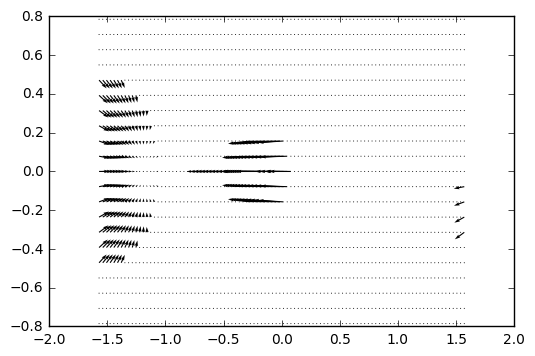

In [7]:
# # Project 3d optic flow vector on (a, b)
ofx = np.sum(p*a, axis=1)
ofy = np.sum(p*b, axis=1)

# # Display
plt.quiver(layout[:,0], layout[:,1], 
           ofx, ofy, scale =5)

In [8]:
with open('opticFlow.pickle', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([ofx,ofy], f)